<a href="https://colab.research.google.com/github/atharvakarnik/DataScience/blob/master/LIGO_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import h5py

print('Done importing all libraries!')

Done importing all libraries!


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
#fname = 'GW190814_posterior_samples.h5'
hfile = h5py.File('/content/drive/My Drive/ProjectFiles/GW190814_posterior_samples.h5')
list(hfile.keys())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


['C01:IMRPhenomD',
 'C01:IMRPhenomHM',
 'C01:IMRPhenomNSBH',
 'C01:IMRPhenomPv3HM',
 'C01:SEOBNRv4HM_ROM',
 'C01:SEOBNRv4PHM',
 'C01:SEOBNRv4_ROM',
 'C01:SEOBNRv4_ROM_NRTidalv2_NSBH',
 'combined',
 'history',
 'version']

In [ ]:
imrpd = hfile['C01:SEOBNRv4_ROM_NRTidalv2_NSBH']
imprdSq = np.squeeze(imrpd)

In [ ]:
print(hfile['version'])

<HDF5 group "/version" (3 members)>


In [ ]:
hdfFile = h5py.File('/content/drive/My Drive/ProjectFiles/L-L1_GWOSC_4KHZ_R1-1249850209-4096.hdf5')
list(hdfFile.keys())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


['meta', 'quality', 'strain']

In [ ]:
#Another method to list down the keys
for key in hdfFile.keys():
  print(key)

meta
quality
strain


In [ ]:
#Reading the strain data

strain = hdfFile['strain']['Strain'].value
ts = hdfFile['strain']['Strain'].attrs['Xspacing']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


In [ ]:
#Printing the meta data

metaKeys = hdfFile['meta'].keys()
meta = hdfFile['meta']
for key in metaKeys:
    print(key, meta[key].value)

Description Strain data time series from LIGO
DescriptionURL http://www.gw-openscience.org/
Detector L1
Duration 4096
GPSstart 1249850209
Observatory L
Type StrainTimeSeries
UTCstart 2019-08-14T20:36:31


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.


In [ ]:
#Creating a time vector

gpsStart = meta['GPSstart'].value
duration = meta['Duration'].value
gpsEnd   = gpsStart + duration
time = np.arange(gpsStart, gpsEnd, ts)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.


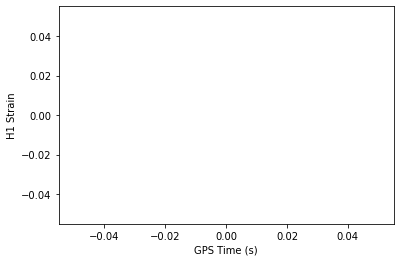

In [ ]:
#Plotting the time series

import matplotlib.pyplot as plt
samples = 10000
plt.plot(time[0:samples], strain[0:samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()